## Описание данных

### Origin: 
This dataset is a subset of the 1987 National Indonesia Contraceptive Prevalence Survey 
### Data Set Information:
The samples are married women who were either not pregnant or do not know if they were at the time of interview. The problem is to predict the current contraceptive method choice (no use, long-term methods, or short-term methods) of a woman based on her demographic and socio-economic characteristics.
### Attribute Information:
1. Wife's age (numerical) 
2. Wife's education (categorical) 1=low, 2, 3, 4=high 
3. Husband's education (categorical) 1=low, 2, 3, 4=high 
4. Number of children ever born (numerical) 
5. Wife's religion (binary) 0=Non-Islam, 1=Islam 
6. Wife's now working? (binary) 0=Yes, 1=No 
7. Husband's occupation (categorical) 1, 2, 3, 4 
8. Standard-of-living index (categorical) 1=low, 2, 3, 4=high 
9. Media exposure (binary) 0=Good, 1=Not good 
10. Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-term

### Информация о датасете
Содержит даннные опроса замужних женщин, которые не беременны, либо не знали о своей беременности на момент опроса. Проблема состоит в предсказании выбора контрацептивов женщинами (не использует, долгосрочные, короткосрочные), на основании их демографических и социо-экономических характеристик.
### Ссылка на данные
https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice
### Информация о данных (признаках)
1. Возраст жены (числовой)
2. Образование жены (категориальный) 1=low, 2, 3, 4=high
3. Образование мужа (категориальный) 1=low, 2, 3, 4=high
4. Количество детей (числовой)
5. Религия жены (бинарный) 0=Non-Islam, 1=Islam
6. Жена не работает (бинарный) 0=Yes, 1=No
7. Тип работы мужа (категориальный) 1, 2, 3, 4 
8. Индекс уровня жизни (категориальный) 1=low, 2, 3, 4=high 
9. Освещение в СМИ (бинарный) 0=Good, 1=Not good
10. Используемые контрацептивы (классовый признак) 1=No-use, 2=Long-term, 3=Short-term

In [157]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


In [158]:
data = pd.read_csv('source/cmc.data', sep = ',', engine = 'python', names = ["Wife age", "Wife education", "Husband education", "Number of children ever born", "Wife religion is Islam", "Wife now working", "Husband occupation", "Standard-of-living index", "Media exposure", "Contraceptive method used"], usecols = ["Wife age", "Wife education", "Husband education", "Number of children ever born", "Wife religion is Islam", "Wife now working", "Husband occupation", "Standard-of-living index", "Media exposure", "Contraceptive method used"])

In [159]:
type(data)

pandas.core.frame.DataFrame

In [160]:
#Позже мы увидели, что в датасете так же неправильно определились типы признаков (все как int64), исправим это сейчас
data['Wife religion is Islam'] = data['Wife religion is Islam'].astype('bool')
data['Wife now working'] = data['Wife now working'].astype('bool')
data['Media exposure'] = data['Media exposure'].astype('bool')

data['Wife education'] = data['Wife education'].astype('category', ordered=True)
data['Husband education'] = data['Husband education'].astype('category', ordered=True)
data['Husband occupation'] = data['Husband occupation'].astype('category', ordered=True)
data['Standard-of-living index'] = data['Standard-of-living index'].astype('category', ordered=True)
data['Contraceptive method used'] = data['Contraceptive method used'].astype('category', ordered=True)

In [161]:
data

,Wife age,Wife education,Husband education,Number of children ever born,Wife religion is Islam,Wife now working,Husband occupation,Standard-of-living index,Media exposure,Contraceptive method used
0,24,2,3,3,True,True,2,3,False,1
1,45,1,3,10,True,True,3,4,False,1
2,43,2,3,7,True,True,3,4,False,1
3,42,3,2,9,True,True,3,3,False,1
4,36,3,3,8,True,True,3,2,False,1
5,19,4,4,0,True,True,3,3,False,1
6,38,2,3,6,True,True,3,2,False,1
7,21,3,3,1,True,False,3,2,False,1
8,27,2,3,3,True,True,3,4,False,1
9,45,1,1,8,True,True,2,2,True,1


In [162]:
print(data)

      Wife age Wife education Husband education  Number of children ever born  \
0           24              2                 3                             3   
1           45              1                 3                            10   
2           43              2                 3                             7   
3           42              3                 2                             9   
4           36              3                 3                             8   
5           19              4                 4                             0   
6           38              2                 3                             6   
7           21              3                 3                             1   
8           27              2                 3                             3   
9           45              1                 1                             8   
10          38              1                 3                             2   
11          42              

In [163]:
#Выведем первыые 5 строк датафрейма
data.head()

,Wife age,Wife education,Husband education,Number of children ever born,Wife religion is Islam,Wife now working,Husband occupation,Standard-of-living index,Media exposure,Contraceptive method used
0,24,2,3,3,True,True,2,3,False,1
1,45,1,3,10,True,True,3,4,False,1
2,43,2,3,7,True,True,3,4,False,1
3,42,3,2,9,True,True,3,3,False,1
4,36,3,3,8,True,True,3,2,False,1


In [164]:
#Выведем 5 последних строк
data.tail()

,Wife age,Wife education,Husband education,Number of children ever born,Wife religion is Islam,Wife now working,Husband occupation,Standard-of-living index,Media exposure,Contraceptive method used
1468,33,4,4,2,True,False,2,4,False,3
1469,33,4,4,3,True,True,1,4,False,3
1470,39,3,3,8,True,False,1,4,False,3
1471,33,3,3,4,True,False,2,2,False,3
1472,17,3,3,1,True,True,2,4,False,3


In [165]:
#Выведем размерность данных
print(data.shape)

(1473, 10)


In [166]:
#Выведем названия колонок
print(data.columns)

Index(['Wife age', 'Wife education', 'Husband education',
       'Number of children ever born', 'Wife religion is Islam',
       'Wife now working', 'Husband occupation', 'Standard-of-living index',
       'Media exposure', 'Contraceptive method used'],
      dtype='object')


In [167]:
data.index

RangeIndex(start=0, stop=1473, step=1)

In [168]:
#Выведем значение столбца Wife age из строки 3
data.at[2, 'Wife age']

43

In [169]:
#Вывод конкретного столбца
data['Wife age']

0       24
1       45
2       43
3       42
4       36
5       19
6       38
7       21
8       27
9       45
10      38
11      42
12      44
13      42
14      38
15      26
16      48
17      39
18      37
19      39
20      26
21      24
22      46
23      39
24      48
25      40
26      38
27      29
28      24
29      43
        ..
1443    21
1444    22
1445    36
1446    45
1447    34
1448    35
1449    19
1450    27
1451    37
1452    26
1453    28
1454    31
1455    32
1456    40
1457    27
1458    27
1459    37
1460    22
1461    27
1462    21
1463    30
1464    23
1465    25
1466    42
1467    29
1468    33
1469    33
1470    39
1471    33
1472    17
Name: Wife age, Length: 1473, dtype: int64

In [170]:
data['Wife age'][3]

42

In [171]:
#Выведем тип признака Wife education
data['Wife education'].dtype.name

'category'

In [172]:
type(data['Wife religion is Islam'][3])

numpy.bool_

In [173]:
type(data['Wife religion is Islam'])

pandas.core.series.Series

In [174]:
#Выведем основную информацию о датафрейме 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
Wife age                        1473 non-null int64
Wife education                  1473 non-null category
Husband education               1473 non-null category
Number of children ever born    1473 non-null int64
Wife religion is Islam          1473 non-null bool
Wife now working                1473 non-null bool
Husband occupation              1473 non-null category
Standard-of-living index        1473 non-null category
Media exposure                  1473 non-null bool
Contraceptive method used       1473 non-null category
dtypes: bool(3), category(5), int64(2)
memory usage: 35.3 KB
None


In [175]:
#Вывод первых 5 строк из 2 столбцов
data[['Husband education', 'Media exposure']].head()

,Husband education,Media exposure
0,3,False
1,3,False
2,3,False
3,2,False
4,3,False


In [176]:
#Выведем основную статистическую информацию (число не пустых значений, среднее, стандартное отклонение, минимальное значение, 0.25-0.50-0.75 персентили, максимальное значение)
data.describe()

,Wife age,Number of children ever born
count,1473.000000,1473.000000
mean,32.538357,3.261371
std,8.227245,2.358549
min,16.000000,0.000000
25%,26.000000,1.000000
50%,32.000000,3.000000
75%,39.000000,4.000000
max,49.000000,16.000000


In [177]:
#Построим парные дианраммы рассеяния. По диагонали - гистограммы каждого признака
from pandas.plotting import scatter_matrix
#scatter_matrix(data, alpha = .01, figsize = (10, 10), marker='o')
pass

In [178]:
#Выведем корреляционную матрицу
data.corr()

,Wife age,Number of children ever born,Wife religion is Islam,Wife now working,Media exposure
Wife age,1.000000,0.540126,-0.139543,-0.039880,0.113306
Number of children ever born,0.540126,1.000000,0.073917,0.097316,0.133658
Wife religion is Islam,-0.139543,0.073917,1.000000,0.069837,0.060243
Wife now working,-0.039880,0.097316,0.069837,1.000000,0.001828
Media exposure,0.113306,0.133658,0.060243,0.001828,1.000000


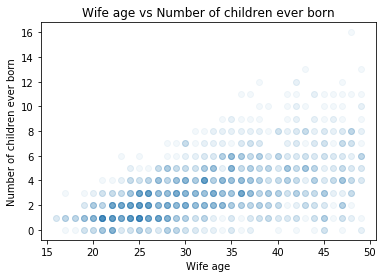

In [179]:
plt.plot(data['Wife age'], data['Number of children ever born'], 'o', alpha = 0.05)
plt.xlabel('Wife age')
plt.ylabel('Number of children ever born')
plt.title('Wife age vs Number of children ever born')
pass

In [180]:
#Вычисление условия для каждой строки (выведем первые 5 для компактности)
data['Wife religion is Islam'].head() == True

0    True
1    True
2    True
3    True
4    True
Name: Wife religion is Islam, dtype: bool

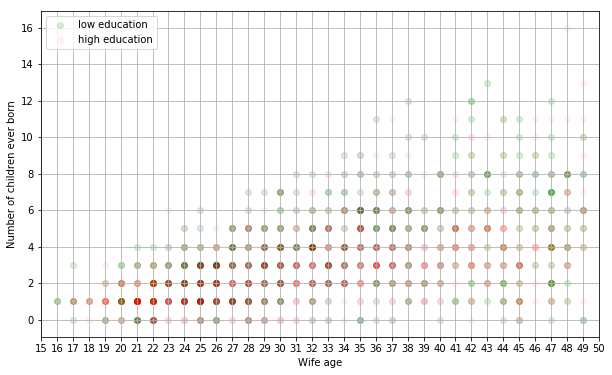

In [181]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['Wife education'] <=2]['Wife age'],
            data[data['Wife education'] <=2]['Number of children ever born'],
            alpha = 0.15,
            label = 'low education',
            color = 'g')

plt.scatter(data[data['Wife education'] >=3]['Wife age'],
            data[data['Wife education'] >=3]['Number of children ever born'],
            alpha = 0.05,
            label = 'high education',
            color = 'r')

plt.xlabel('Wife age')
plt.xticks(range(51))
plt.xlim(15, 50)
plt.ylabel('Number of children ever born')
plt.legend()
plt.grid()

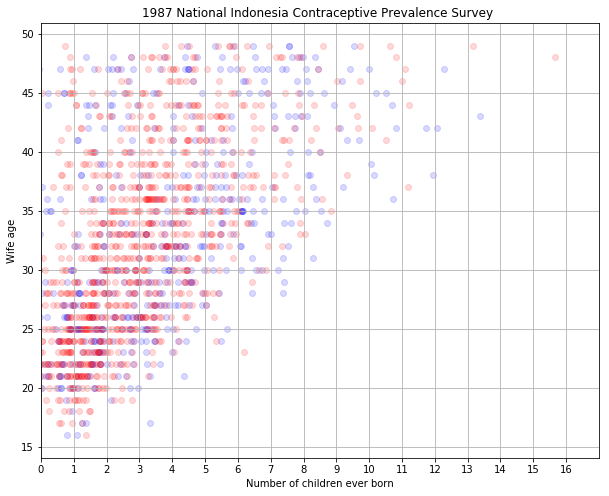

In [182]:
np.random.seed(0)
education_num_rnd = data['Number of children ever born'] + np.random.rand(data.shape[0]) - .5

plt.figure(figsize = (10, 8))

plt.scatter(education_num_rnd[data['Wife education'] <=2],
            data[data['Wife education'] <=2]['Wife age'],
            alpha = 0.15,
            label = '<=2',
            color = 'b')

plt.scatter(education_num_rnd[data['Wife education'] >=3],
            data[data['Wife education'] >=3]['Wife age'],
            alpha = 0.15,
            label= '>=3',
            color = 'r')

plt.xlabel('Number of children ever born')
plt.xticks(range(17))
plt.xlim(0, 17)
plt.ylabel('Wife age')
plt.title('1987 National Indonesia Contraceptive Prevalence Survey ')
plt.grid()

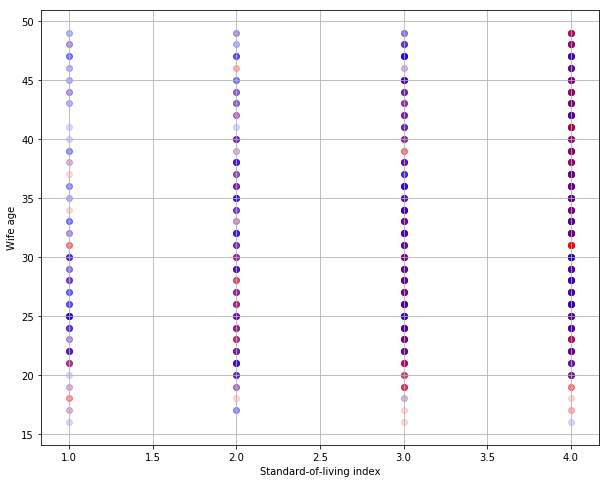

In [183]:
plt.figure(figsize = (10, 8))

plt.scatter(data[data['Wife education'] >=3]['Standard-of-living index'],
            data[data['Wife education'] >=3]['Wife age'],
            alpha = 0.15,
            label = '>=3',
            color = 'r')

plt.scatter(data[data['Wife education']<=2]['Standard-of-living index'],
            data[data['Wife education']<=2]['Wife age'],
            alpha = 0.15,
            label = '<=2',
            color = 'b')

plt.xlabel('Standard-of-living index')
plt.ylabel('Wife age')
plt.grid()

In [184]:
#Выведем уникальные значения
data['Wife age'].unique()

array([24, 45, 43, 42, 36, 19, 38, 21, 27, 44, 26, 48, 39, 37, 46, 40, 29,
       31, 33, 25, 28, 47, 32, 49, 34, 20, 22, 30, 23, 35, 41, 17, 18, 16],
      dtype=int64)

In [185]:
data['Husband education'].unique()

[3, 2, 4, 1]
Categories (4, int64): [1 < 2 < 3 < 4]

In [186]:
for name in data['Wife age'].unique():
    print(name, data['Number of children ever born'][data['Wife age'] == name].iloc[0])

24 3
45 10
43 7
42 9
36 8
19 0
38 6
21 1
27 3
44 1
26 0
48 7
39 6
37 8
46 1
40 8
29 0
31 2
33 2
25 4
28 1
47 0
32 2
49 7
34 1
20 2
22 1
30 3
23 2
35 3
41 10
17 3
18 0
16 1


In [187]:
data['Contraceptive method used'].unique()

[1, 2, 3]
Categories (3, int64): [1 < 2 < 3]

In [188]:
#Пункт с пропущенными значениями пропустила, потому что все значения присутствуют

In [189]:
data.dtypes

Wife age                           int64
Wife education                  category
Husband education               category
Number of children ever born       int64
Wife religion is Islam              bool
Wife now working                    bool
Husband occupation              category
Standard-of-living index        category
Media exposure                      bool
Contraceptive method used       category
dtype: object

In [190]:
#Делим данные на категориальные с помощью цикла
categorical_columns = [c for c in data.columns if data[c].dtype.name == ('category' or 'bool')]
print(categorical_columns)

['Wife education', 'Husband education', 'Husband occupation', 'Standard-of-living index', 'Contraceptive method used']


In [191]:
#И количественные
numerical_columns = [c for c in data.columns if data[c].dtype.name == 'int64']
print(numerical_columns)

['Wife age', 'Number of children ever born']


In [192]:
for c in categorical_columns:
    print(c, data[c].unique())

Wife education [2, 1, 3, 4]
Categories (4, int64): [1 < 2 < 3 < 4]
Husband education [3, 2, 4, 1]
Categories (4, int64): [1 < 2 < 3 < 4]
Husband occupation [2, 3, 1, 4]
Categories (4, int64): [1 < 2 < 3 < 4]
Standard-of-living index [3, 4, 2, 1]
Categories (4, int64): [1 < 2 < 3 < 4]
Contraceptive method used [1, 2, 3]
Categories (3, int64): [1 < 2 < 3]


In [193]:
#Используем функцию для выбора бинарных признаков
binary_columns = data.select_dtypes(include=['bool'])
nonbinary_columns = data.select_dtypes(include=['category'])
binary_columns.head()

,Wife religion is Islam,Wife now working,Media exposure
0,True,True,False
1,True,True,False
2,True,True,False
3,True,True,False
4,True,True,False


In [194]:
nonbinary_columns.head()

,Wife education,Husband education,Husband occupation,Standard-of-living index,Contraceptive method used
0,2,3,2,3,1
1,1,3,3,4,1
2,2,3,3,4,1
3,3,2,3,3,1
4,3,3,3,2,1


In [195]:
#Конвертируем категориальные признаки в "индикаторные"
data_nonbinary = pd.get_dummies(nonbinary_columns)
print(data_nonbinary.columns)

Index(['Wife education_1', 'Wife education_2', 'Wife education_3',
       'Wife education_4', 'Husband education_1', 'Husband education_2',
       'Husband education_3', 'Husband education_4', 'Husband occupation_1',
       'Husband occupation_2', 'Husband occupation_3', 'Husband occupation_4',
       'Standard-of-living index_1', 'Standard-of-living index_2',
       'Standard-of-living index_3', 'Standard-of-living index_4',
       'Contraceptive method used_1', 'Contraceptive method used_2',
       'Contraceptive method used_3'],
      dtype='object')


In [196]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,Wife age,Number of children ever born
count,1473.000000,1473.000000
mean,32.538357,3.261371
std,8.227245,2.358549
min,16.000000,0.000000
25%,26.000000,1.000000
50%,32.000000,3.000000
75%,39.000000,4.000000
max,49.000000,16.000000


In [197]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [198]:
data_numerical.describe()

,Wife age,Number of children ever born
count,1.473000e+03,1.473000e+03
mean,2.722421e-16,1.730531e-16
std,1.000000e+00,1.000000e+00
min,-2.010194e+00,-1.382787e+00
25%,-7.947201e-01,-9.587978e-01
50%,-6.543589e-02,-1.108187e-01
75%,7.853957e-01,3.131708e-01
max,2.000869e+00,5.401045e+00


In [199]:
data.describe()

,Wife age,Number of children ever born
count,1473.000000,1473.000000
mean,32.538357,3.261371
std,8.227245,2.358549
min,16.000000,0.000000
25%,26.000000,1.000000
50%,32.000000,3.000000
75%,39.000000,4.000000
max,49.000000,16.000000


## X и Y

In [200]:
y = data['Contraceptive method used'] # у - целевая переменная (метка)
X = data.drop(('Contraceptive method used'), axis = 1) # выбрасываем столбец 'Contraceptive method used', пространство всех возможных объектов
feature_names = X.columns

In [201]:
type(feature_names)

pandas.core.indexes.base.Index

In [202]:
print(feature_names)

Index(['Wife age', 'Wife education', 'Husband education',
       'Number of children ever born', 'Wife religion is Islam',
       'Wife now working', 'Husband occupation', 'Standard-of-living index',
       'Media exposure'],
      dtype='object')


In [203]:
print(X.shape)
print(y.shape)
N, d = X.shape

(1473, 9)
(1473,)


In [204]:
type(X)

pandas.core.frame.DataFrame

In [205]:
print(y)

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
1443    3
1444    3
1445    3
1446    3
1447    3
1448    3
1449    3
1450    3
1451    3
1452    3
1453    3
1454    3
1455    3
1456    3
1457    3
1458    3
1459    3
1460    3
1461    3
1462    3
1463    3
1464    3
1465    3
1466    3
1467    3
1468    3
1469    3
1470    3
1471    3
1472    3
Name: Contraceptive method used, Length: 1473, dtype: category
Categories (3, int64): [1 < 2 < 3]


In [206]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train = X_train.shape 
N_test = X_test.shape 

#Выведем кол-во тренировочных и тестовых данных
print(N_train, N_test)

(1031, 9) (442, 9)


In [207]:
1031 + 442

1473

## kNN - Метод k ближайших соседей

In [208]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
#Тренируем модель
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [209]:
#Тестируем модель на обучающей и тренировочной выборке
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

#Вычисляем ошибку на тренировчной и тестовой выборке
err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

#Ошибки на тестовой на выборке значительно выше, чем на обучающей, что говорит о переобучении модели
print(err_train, err_test)

0.2870999030067895 0.5203619909502263


In [210]:
err_test = knn.score(X_test, y_test) # Другой способ

In [211]:
err_test

0.4796380090497738

In [212]:
from sklearn.metrics import confusion_matrix
#Матрица ошибок (Confusion matrix)
print(confusion_matrix(y_test, y_test_predict))

[[122  19  53]
 [ 31  33  37]
 [ 75  15  57]]


In [213]:
#Пример
confusion_matrix([0,1,0,1,0], [0,1,0,0,0])

array([[3, 0],
       [1, 1]])

In [214]:
#Найдём лучшее число соседей
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 30, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.46653734238603295 30


In [215]:
# Проверяем модель с лучшим числом соседей
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.42870999030067897 0.4321266968325792


In [216]:
# SVC (support vector classifier) - классификатор опорных векторов
from sklearn.svm import SVC
# Обучаем модель
svc = SVC().fit(X_train, y_train)

# Посчитаем ошибки
err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.3452958292919496 0.4276018099547511


In [217]:
from sklearn.grid_search import GridSearchCV
# Ищем лучшие параметры С (параметр регуляризации) и гамма (радиус гауссовского ядра)
Cs = 10.**np.arange(-5, 5)
gamma_array = 10.**np.arange(-5, 5)

svc = SVC()
grid = GridSearchCV(svc, param_grid = {'C': Cs, 'gamma': gamma_array})
#Обучаем модель с разными С и гамма
grid.fit(X_train, y_train)

# Вычисляем лучшие С и гамму
best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print(best_cv_err, best_C)

0.44519883608147426 10.0


In [218]:
# Обучаем модель с лучшим значением параметра С (=10.0)
svc = SVC(C = best_C).fit(X_train, y_train)

# Вычисляем ошибку на тренировочной и тестовой выборке
err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.16488845780795344 0.4683257918552036


## Обучить на ваших данных 1) Random Forest, 2) Extremely Random Forest, 3) AdaBoost, 4) Gradient Boosted Trees

### 1) Random Forest

In [219]:
from sklearn import ensemble
# Подобрала лучшие параметры для леса - 1000 деревьев, 100 листьев
rf = ensemble.RandomForestClassifier(n_estimators = 1000, max_leaf_nodes = 100, random_state = 0)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.1842870999030068 0.40497737556561086


In [220]:
# Ищем лучшее количество деревьев
tree_arr = np.linspace(100, 1100, 11)
tree_arr = tree_arr.astype('int')
print(tree_arr)
test_err = []
train_err = []
for tree in tree_arr:
    rf = ensemble.RandomForestClassifier(n_estimators = tree)
    rf.fit(X_train, y_train)

    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

[ 100  200  300  400  500  600  700  800  900 1000 1100]


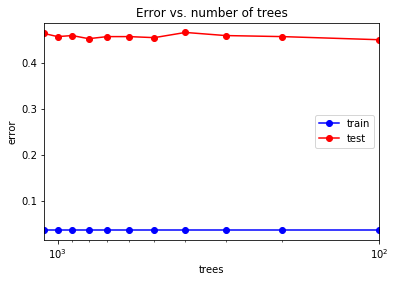

In [221]:
plt.semilogx(tree_arr, train_err, 'b-o', label = 'train')
plt.semilogx(tree_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(tree_arr), np.min(tree_arr)])
plt.title('Error vs. number of trees')
plt.xlabel('trees')
plt.ylabel('error')
plt.legend()
pass

Можем сделать вывод, что количество деревьев в модели не сильно влияет на возможность прогнозирования. Переобучение, рекомендуется настраивать max_leaf_nodes

### 2) Extremely random forests

In [222]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 1000, max_leaf_nodes = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

0.20368574199806014 0.4434389140271493


In [223]:
# Ищем лучшее количество деревьев
tree_arr_ert = np.linspace(100, 1000, 10)
tree_arr_ert = tree_arr_ert.astype('int')
print(tree_arr_ert)
test_err = []
train_err = []
for tree in tree_arr_ert:
    ert = ensemble.ExtraTreesClassifier(n_estimators = tree)
    ert.fit(X_train, y_train)

    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

[ 100  200  300  400  500  600  700  800  900 1000]


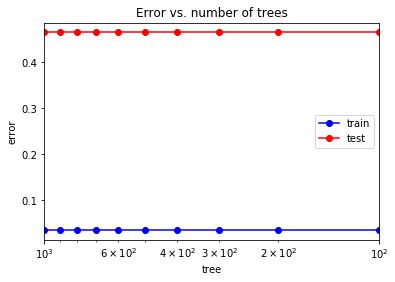

In [224]:
plt.semilogx(tree_arr_ert, train_err, 'b-o', label = 'train')
plt.semilogx(tree_arr_ert, test_err, 'r-o', label = 'test')
plt.xlim([np.max(tree_arr_ert), np.min(tree_arr_ert)])
plt.title('Error vs. number of trees')
plt.xlabel('tree')
plt.ylabel('error')
plt.legend()
pass

Видим ту же самую картину, что и со случайным лесом - переобучение.

### 3) Adaboost

In [225]:
# Тренируем модель, вычисляем ошибки
ada = ensemble.AdaBoostClassifier(n_estimators = 100)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.4248302618816683 0.4253393665158371


In [226]:
# Находим лучшее число деревьев
tree_arr_ada = np.linspace(100, 1000, 10)
tree_arr_ada = tree_arr_ada.astype('int')
print(tree_arr_ada)
test_err = []
train_err = []
for tree in tree_arr_ada:
    ert = ensemble.AdaBoostClassifier(n_estimators = tree)
    ert.fit(X_train, y_train)

    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

[ 100  200  300  400  500  600  700  800  900 1000]


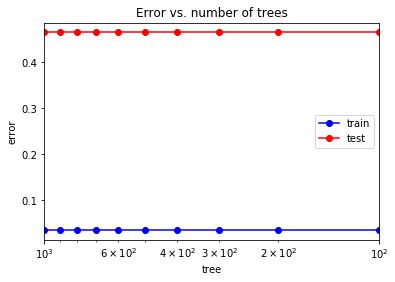

In [227]:
plt.semilogx(tree_arr_ada, train_err, 'b-o', label = 'train')
plt.semilogx(tree_arr_ada, test_err, 'r-o', label = 'test')
plt.xlim([np.max(tree_arr_ada), np.min(tree_arr_ada)])
plt.title('Error vs. number of trees')
plt.xlabel('tree')
plt.ylabel('error')
plt.legend()
pass

Переобучение

### 4) Gradient boosted trees (градиентный бустинг деревьев регрессии)

In [228]:
# Построим модель, посчитаем ошибки
gbt = ensemble.GradientBoostingClassifier(n_estimators = 100)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.31619786614936957 0.4343891402714932


In [229]:
# Найдём лучшее число деревьев
tree_arr_gbt = np.linspace(100, 1000, 10)
tree_arr_gbt = tree_arr_gbt.astype('int')
print(tree_arr_gbt)
test_err = []
train_err = []
for tree in tree_arr_gbt:
    ert = ensemble.GradientBoostingClassifier(n_estimators = tree)
    ert.fit(X_train, y_train)

    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

[ 100  200  300  400  500  600  700  800  900 1000]


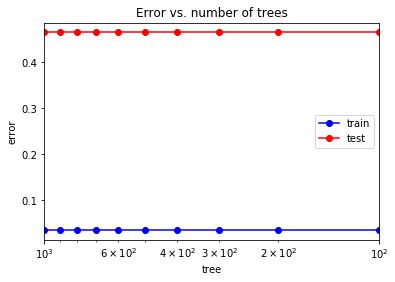

In [230]:
plt.semilogx(tree_arr_gbt, train_err, 'b-o', label = 'train')
plt.semilogx(tree_arr_gbt, test_err, 'r-o', label = 'test')
plt.xlim([np.max(tree_arr_gbt), np.min(tree_arr_gbt)])
plt.title('Error vs. number of trees')
plt.xlabel('tree')
plt.ylabel('error')
plt.legend()
pass

Вывод: Во всех 4 примерах наблюдается переобучение

### Значимость признаков

In [231]:
#Строим случайный лес из 1000 деревьев
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.03588748787584869 0.4638009049773756


In [232]:
#Сумма значимости признаков = 1
np.sum(rf.feature_importances_)

1.0000000000000002

In [233]:
#Выведем значимость
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Feature ranking:
 1. feature 'Wife age' (0.340317)
 2. feature 'Number of children ever born' (0.227431)
 3. feature 'Standard-of-living index' (0.090315)
 4. feature 'Wife education' (0.087608)
 5. feature 'Husband occupation' (0.086036)
 6. feature 'Husband education' (0.067592)
 7. feature 'Wife now working' (0.047790)
 8. feature 'Wife religion is Islam' (0.036078)
 9. feature 'Media exposure' (0.016833)


(-1, 9)

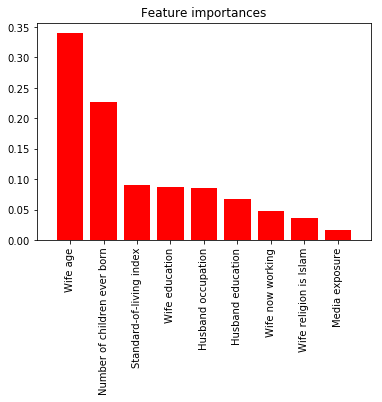

In [238]:
# Строим график значимости признаков
d_first = 9
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

In [274]:
#Можно увидеть, что значимость имеют только 2 первых признака. И возможно третий.

In [240]:
from sklearn.datasets import load_digits
digits = load_digits()

In [241]:
#Разобьем выборку на тренировочную и тестовую.
#Процент тестовой выборки: 30 %
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
N_test, _ = X_test.shape
N_train, _ = X_train.shape 

print(N_train, N_test)

1031 442


### Нейронные сети

In [242]:
#Данная нейронная сеть будет иметь 1 скрытый слой (добавим скрытый слой с 100 нейронами)
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes = (100), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=100, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [243]:
#Тестируем нейронную сеть
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

In [244]:
#Ошибка на обучающей выборке
print(np.mean(y_train != y_train_pred))

0.4190106692531523


In [245]:
#Ошибка на тестовой выборке
print(np.mean(y_test != y_test_pred))

0.4298642533936652


In [246]:
#Добавим второй скрытый слой со 100 нейронами
mlp_model = MLPClassifier(hidden_layer_sizes = (100,100), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [247]:
#Тестируем нейронную сеть
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

In [248]:
#Ошибка на обучающей выборке
print(np.mean(y_train != y_train_pred))

0.4422890397672163


In [249]:
#Ошибка на тестовой выборке
print(np.mean(y_test != y_test_pred))

0.4253393665158371


In [250]:
#У нейронной сети с двумя скрытыми слоями ошибка на тестовой выборке меньше, чем у сети с одним слоем, будем использовать её.

In [251]:
#Подбор гиперпараметров
#Подберем оптимальное значение параметра регуляризации alpha

In [252]:
alpha_arr = np.logspace(-1, 1, 20)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,100), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

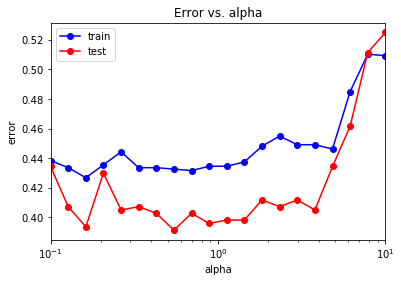

In [253]:
#Построим график зависимости ошибок от alpha
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

In [254]:
#Наблюдаем переобучение при alpha > 8, так как ошибка на тестовой выборке больше, чем на обучающей

In [255]:
print(alpha_arr)

[ 0.1         0.1274275   0.16237767  0.20691381  0.26366509  0.33598183
  0.42813324  0.54555948  0.6951928   0.88586679  1.12883789  1.43844989
  1.83298071  2.33572147  2.97635144  3.79269019  4.83293024  6.15848211
  7.8475997  10.        ]


In [256]:
#Найдем минимальное значение ошибки
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.4267701260911736 0.3914027149321267


Найдем оптимальное значение alpha:

In [257]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[0.54555948]


Классификатор при оптимальном значении alpha

In [258]:
mlp_model = MLPClassifier(alpha = alpha_opt[0], hidden_layer_sizes = (100,100),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.4325897187196896
0.3914027149321267


Будем использовать найденное значение оптимального alpha для нейронной сети с 2 скрытыми слоями, так как ошибка снизилась.
Ищем оптимальное количество нейронов:

In [259]:
neuron_arr = (50, 100, 150, 200, 250, 300, 350, 400)
test_err = []
train_err = []
for neuron in neuron_arr:
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron,neuron), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

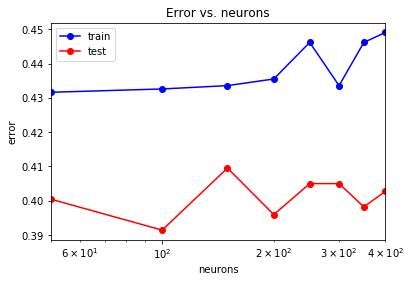

In [260]:
#Строим график зависимости количества нейронов в скрытом слое от alpha 
plt.semilogx(neuron_arr, train_err, 'b-o', label = 'train')
plt.semilogx(neuron_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(neuron_arr), np.max(neuron_arr)])
plt.title('Error vs. neurons')
plt.xlabel('neurons')
plt.ylabel('error')
plt.legend()
pass

In [261]:
#Видно, что модель обучена нормально. Значения ошибки на тренировочных и тестовых данных не сильно разнится.

In [262]:
#Найдем минимальное значение ошибки:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.43161978661493694 0.3914027149321267


Минимальное значение ошибки наблюдается при 100 нейнорнах

In [263]:
#Классификатор при оптимальном количестве нейронов
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100,100), 
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.4325897187196896
0.3914027149321267


In [264]:
#Матрица ошибок. Как видим, результаты не такие уж и плохие, по сравнению с kNN
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[125  24  23]
 [ 15  36  16]
 [ 54  41 108]]


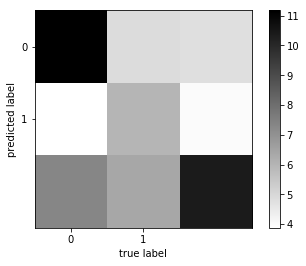

In [265]:
#Строим график матрицы ошибок
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(2))
plt.yticks(range(2))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

Другие метрики качества

In [266]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

          1       0.73      0.64      0.68       194
          2       0.54      0.36      0.43       101
          3       0.53      0.73      0.62       147

avg / total       0.62      0.61      0.60       442



Все ошибки

In [267]:
count = 0
for i in X_test.index:
    x = X_test.loc[i, :]
    dig = y_test[i]
    dig_pred = mlp_model.predict([x])
    if dig_pred != dig:
        count += 1
print("Количество ошибок: "+ str(count))
print("Размер тестовой выборки: " + str(len(X_test)))

Количество ошибок: 173
Размер тестовой выборки: 442


## PCA - Principal Components Analysis (Метод главных компонент)

In [268]:
X = data
X.shape

(1473, 10)

Обучим PCA, уменьшим размерность данных до 7

In [269]:
from sklearn import decomposition 
pca = decomposition.PCA(n_components = 7)
X_train_reduc = pca.fit_transform(X_train)
X_test_reduc = pca.transform(X_test)

Обучаем классификатор вида Extremely Randomized Forests. Число деревьев = 100

In [270]:
from sklearn import ensemble
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

0.03588748787584869 0.47737556561085975


Имеет место явное переобучение

Построим графики зависимости ошибок (ошибка на обучающей выборке и ошибка на тестовой выборке) от количества компонент в методе

[1 2 3 4 5 6 7 8 9]


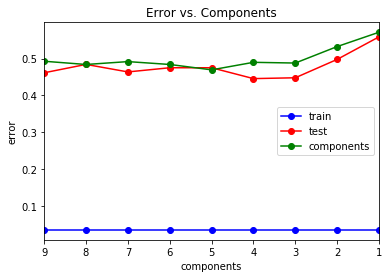

In [271]:
components_arr = np.arange(1, 10, 1)
print(components_arr)
test_err = []
train_err = []
oob_err = []
from sklearn.decomposition import PCA
for components in components_arr:
    pca = PCA(n_components = components)
    X_pca_train = pca.fit_transform(X_train)
    X_pca_test = pca.transform(X_test)
    ert = ensemble.ExtraTreesClassifier(n_estimators = 100, oob_score=True, bootstrap=True)
    ert.fit(X_pca_train, y_train)
    train_err.append(np.mean(y_train != ert.predict(X_pca_train)))
    test_err.append(np.mean(y_test  != ert.predict(X_pca_test)))
    oob_err.append(1 - ert.oob_score_)
plt.plot(components_arr, train_err, 'b-o', label = 'train')
plt.plot(components_arr, test_err, 'r-o', label = 'test')
plt.plot(components_arr, oob_err, 'g-o', label = 'components')
plt.xlim([np.max(components_arr), np.min(components_arr)])
plt.title('Error vs. Components')
plt.xlabel('components')
plt.ylabel('error')
plt.legend()
pass

Мы видим, что уменьшение количества признаков не сильно влияет на обобщающую способность модели.

Найдем минимальное значение ошибки:

In [272]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print ('Минимальная ошибка на тренировочной выборке:', min_train_err)
print ('Минимальная ошибка на тестовой выборке:', min_test_err)

Минимальная ошибка на тренировочной выборке: 0.03588748787584869
Минимальная ошибка на тестовой выборке: 0.4457013574660634


Оптимальное число компонент:

In [273]:
components_opt = components_arr[test_err == min_test_err]
components_opt = components_opt[0]
print(components_opt)

4


Так как при них наблюдается минимальная ошибка на тестовой выборке.